In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from library.sb_utils import save_file

In [2]:
## Load csv
raw_data = pd.read_csv('../raw_data/jds_project_data.csv')

In [3]:
## Take a look at general overview of data
raw_data.info

<bound method DataFrame.info of         match_id  lead_id  agent_id  lead_source_id lead_creation_date  \
0          40667    12289       174               8    1/19/2021 12:08   
1         144108    30625       176              83    1/22/2021 20:41   
2           4314     4446        91              50    1/17/2021 18:48   
3          89955    20851       228              15    1/20/2021 18:53   
4          77985    20544       168             109    1/20/2021 17:57   
...          ...      ...       ...             ...                ...   
147651    139294    35073       118              29    1/25/2021 11:07   
147652     31750    10278       182              39     1/19/2021 5:25   
147653     49027    12080       200               8    1/19/2021 11:29   
147654    113463    24797       206              58    1/21/2021 16:22   
147655     39340    11203         6              57     1/19/2021 9:22   

             matched_at  dial_count source_type state  gender  ...  \
0       1

In [4]:
raw_data.head(10)

,match_id,lead_id,agent_id,lead_source_id,lead_creation_date,matched_at,dial_count,source_type,state,gender,...,phone_type,email_score,email_valid,phone_score,contact_score,block_score,email_reason,contact,quote,app
0,40667,12289,174,8,1/19/2021 12:08,1/19/2021 12:43,1,DELIVERY,AR,Female,...,NaN,10.0,1.0,62,36.0,47.948863,0.0,0,0,0
1,144108,30625,176,83,1/22/2021 20:41,1/25/2021 16:03,2,FORM,MS,NaN,...,NaN,95.0,1.0,98,96.5,73.383948,0.0,0,0,0
2,4314,4446,91,50,1/17/2021 18:48,1/18/2021 9:25,3,DELIVERY,WI,Male,...,NaN,85.0,1.0,98,91.5,58.877858,0.0,0,0,0
3,89955,20851,228,15,1/20/2021 18:53,1/21/2021 11:17,4,DELIVERY,OK,Female,...,NaN,85.0,1.0,99,92.0,55.408187,0.0,0,0,0
4,77985,20544,168,109,1/20/2021 17:57,1/20/2021 17:57,0,FORM,WY,NaN,...,NaN,85.0,1.0,50,67.5,77.281536,0.0,0,0,0
5,125453,31041,93,101,1/23/2021 6:17,1/23/2021 10:29,0,DELIVERY,IL,NaN,...,NaN,70.0,1.0,96,83.0,64.428299,0.0,0,0,0
6,5233,5638,208,30,1/18/2021 9:42,1/18/2021 9:42,0,DELIVERY,TX,Female,...,NaN,85.0,1.0,98,91.5,58.532827,0.0,0,0,0
7,71042,19282,165,25,1/20/2021 14:27,1/20/2021 14:27,0,DELIVERY,SC,Female,...,NaN,80.0,1.0,99,89.5,63.032884,0.0,1,0,0
8,109934,24982,97,25,1/21/2021 16:53,1/22/2021 9:48,5,DELIVERY,OK,Male,...,NaN,30.0,1.0,72,51.0,47.662713,0.0,0,0,0
9,16705,5813,234,3,1/18/2021 10:06,1/18/2021 14:02,3,DELIVERY,OH,Male,...,NaN,85.0,1.0,65,75.0,78.157436,0.0,0,0,0


In [5]:
## Find general structure of a sample entry
raw_data[raw_data['match_id'] == 40667].T

,0
match_id,40667
lead_id,12289
agent_id,174
lead_source_id,8
lead_creation_date,1/19/2021 12:08
matched_at,1/19/2021 12:43
dial_count,1
source_type,DELIVERY
state,AR
gender,Female


In [6]:
## View missing values
missing = pd.concat([raw_data.isnull().sum(), 100 * raw_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
match_id,0,0.000000
contact,0,0.000000
block_score,0,0.000000
phone_score,0,0.000000
quote,0,0.000000
lead_cost,0,0.000000
age,0,0.000000
state,0,0.000000
app,0,0.000000
dial_count,0,0.000000


In [7]:
## Look for categorical features
raw_data.select_dtypes('object')

,lead_creation_date,matched_at,source_type,state,gender,prepaid_phone,phone_in_service
0,1/19/2021 12:08,1/19/2021 12:43,DELIVERY,AR,Female,Y,I2
1,1/22/2021 20:41,1/25/2021 16:03,FORM,MS,NaN,N,A7
2,1/17/2021 18:48,1/18/2021 9:25,DELIVERY,WI,Male,Y,A7
3,1/20/2021 18:53,1/21/2021 11:17,DELIVERY,OK,Female,N,A7
4,1/20/2021 17:57,1/20/2021 17:57,FORM,WY,NaN,N,I1
...,...,...,...,...,...,...,...
147651,1/25/2021 11:07,1/25/2021 13:45,DELIVERY,GA,Female,N,A7
147652,1/19/2021 5:25,1/19/2021 9:54,DELIVERY,IN,Male,N,A7
147653,1/19/2021 11:29,1/19/2021 16:07,DELIVERY,WI,Male,N,A7
147654,1/21/2021 16:22,1/22/2021 10:57,DELIVERY,SC,Female,N,A7


In [8]:
## Check for duplicate matches
raw_data['match_id'].value_counts().head()

2047      1
76815     1
134507    1
132458    1
138601    1
Name: match_id, dtype: int64

In [9]:
## Look at leads that have been contacted more than once
raw_data['lead_id'].value_counts().head()

19211    12
17996    12
19262    12
18474    12
18675    12
Name: lead_id, dtype: int64

In [10]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,147656.0,73828.500000,42624.760011,1.000000,36914.750000,73828.500000,110742.250000,147656.0
lead_id,147656.0,18091.522525,10109.974973,1.000000,9631.000000,17978.000000,25889.000000,38167.0
agent_id,147656.0,143.007308,78.171827,1.000000,76.000000,146.000000,212.000000,272.0
lead_source_id,147656.0,48.922645,30.328654,1.000000,29.000000,44.000000,66.000000,119.0
dial_count,147656.0,2.465900,2.132447,0.000000,1.000000,2.000000,4.000000,11.0
age,147656.0,69.479120,6.896280,0.000000,64.000000,67.000000,73.000000,121.0
lead_cost,147656.0,24.762718,25.844823,0.010000,4.630000,17.270000,38.880000,526.5
result,108572.0,2.060771,0.238910,2.000000,2.000000,2.000000,2.000000,3.0
lead_age_at_acquisition,106041.0,6167.786044,74326.916065,0.000000,1.761100,3.360200,60.315400,5696218.0
phone_type,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


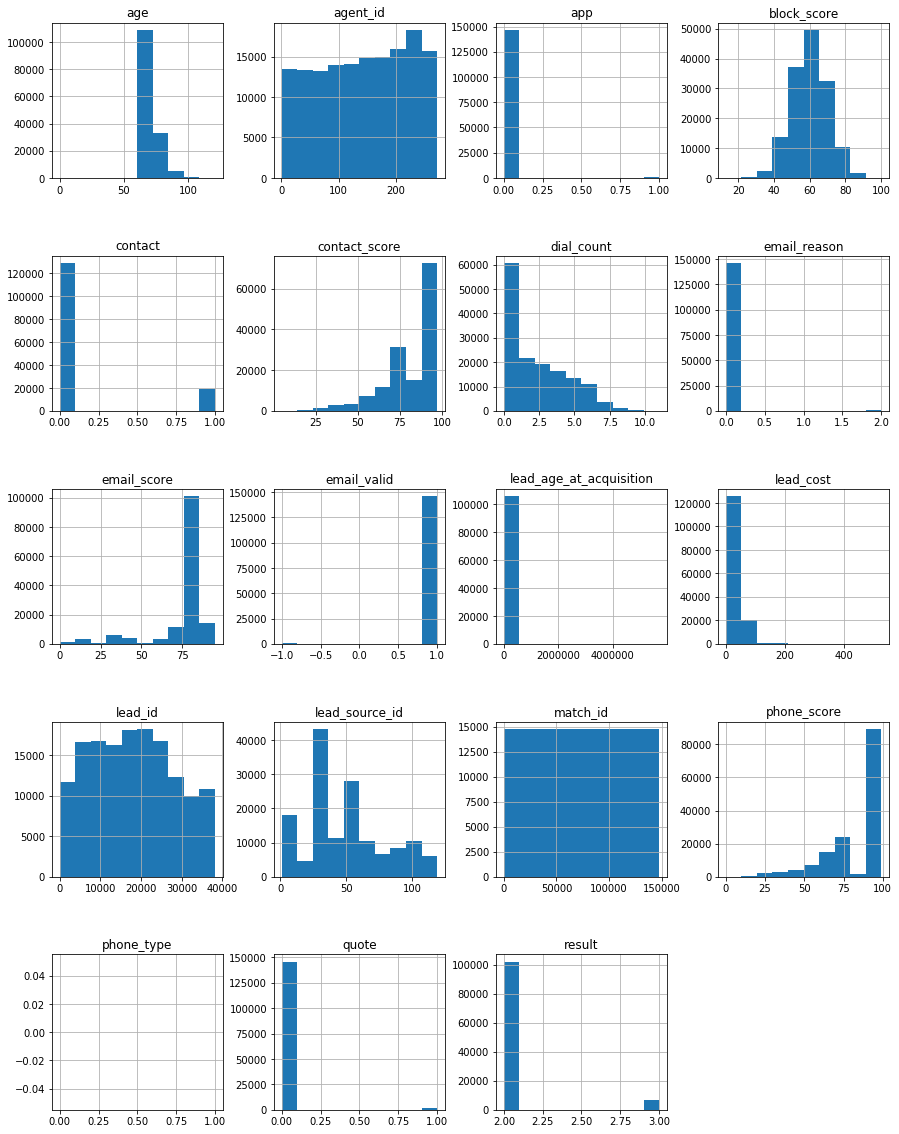

In [11]:
raw_data.hist(figsize = (15,20))
plt.subplots_adjust(hspace = 0.5)

In [12]:
## Begin dropping columns and cleaning entries
cleaned_data = raw_data.copy()
cleaned_data.drop(columns = ['phone_type'], inplace = True)
cleaned_data.dropna(subset=['email_score', 'contact_score'], inplace = True)

values = {'prepaid_phone': 'X', 'phone_in_service': 'X', 'email_reason': -1, 'gender': 'X', 'result': -1, 'lead_age_at_acquisition': -1}
cleaned_data.fillna(value=values, inplace = True)

In [13]:
## Check for any remaining missing values
missing = pd.concat([cleaned_data.isnull().sum(), 100 * cleaned_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
match_id,0,0.0
contact,0,0.0
email_reason,0,0.0
block_score,0,0.0
contact_score,0,0.0
phone_score,0,0.0
email_valid,0,0.0
email_score,0,0.0
phone_in_service,0,0.0
prepaid_phone,0,0.0


In [14]:
cleaned_data.to_csv('jds_clean_data.csv', index = False)